In [1]:
# Pour la manipulation de tableaux et Dataframes
import numpy as np
import pandas as pd

# Pour la visualisation des performances
import matplotlib.pyplot as plt
import seaborn as sns

# Pour instancier une couche Dense et modèle séquentiel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Chargement du dataset

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data         # les features (4 colonnes : longueur/largeur des pétales et sépales)
y = iris.target       # les classes (0, 1, 2)

display(X)
display(y)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Séparation train / test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3)

### Construction du réseau de neurones

In [5]:
# Construction du réseau de neurones : modèle séquentiel de couches denses
model = Sequential()
model.add(Dense(units=10, activation="tanh",input_shape=(X.shape[1],)))
model.add(Dense(units=8, activation="tanh"))
model.add(Dense(units=6, activation="tanh"))
model.add(Dense(units=3, activation="softmax"))

d:\Sources\DS-Deep-Learning\Keras\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Visualisation de l'architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213 (852.00 B)

 Trainable params: 213 (852.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compilation du modèle
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

### Entraînement du modèle

In [ ]:
# Entraînement : lots de 32 échantillons, 500 époques, 10% des échantillons pour validation
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.1)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.3747 - loss: 1.1595 - val_accuracy: 0.0000e+00 - val_loss: 1.4590
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3904 - loss: 1.1238 - val_accuracy: 0.0000e+00 - val_loss: 1.4065
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3826 - loss: 1.0891 - val_accuracy: 0.0000e+00 - val_loss: 1.3634
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3708 - loss: 1.1077 - val_accuracy: 0.0000e+00 - val_loss: 1.3195
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3435 - loss: 1.1175 - val_accuracy: 0.0000e+00 - val_loss: 1.2766
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3318 - loss: 1.1002 - val_accuracy: 0.0000e+00 - val_loss: 1.2438
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3357 - loss: 1.1054 - val_accuracy: 0.0000e+00 - val_loss: 1.2117
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3474 - loss: 1.1009 - val

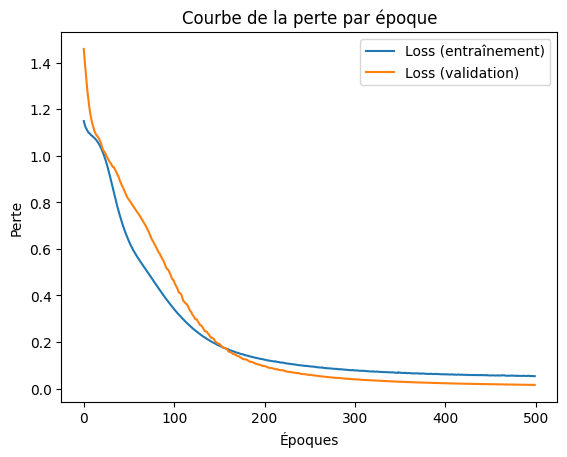

In [ ]:
# Affichage de la perte par époque
plt.plot(history.history['loss'], label='Loss (entraînement)')
plt.plot(history.history['val_loss'], label='Loss (validation)')
plt.title('Courbe de la perte par époque')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

### Performance du modèle

In [12]:
# Prédiction : attention le modèle renvoie une proba pour chaque classe
y_pred = model.predict(X_test)
display(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[9.9072510e-01, 8.7755416e-03, 4.9930747e-04],
       [9.9012429e-01, 9.3605360e-03, 5.1518535e-04],
       [6.6416147e-03, 9.8886478e-01, 4.4936626e-03],
       [9.8987877e-01, 9.6002826e-03, 5.2101165e-04],
       [4.8199682e-03, 3.7009767e-01, 6.2508237e-01],
       [9.9037081e-01, 9.1231093e-03, 5.0607725e-04],
       [7.0669036e-04, 3.9367422e-02, 9.5992589e-01],
       [7.8552291e-03, 9.6344882e-01, 2.8696015e-02],
       [7.0450907e-03, 9.8848593e-01, 4.4689486e-03],
       [9.9062282e-01, 8.8795293e-03, 4.9768097e-04],
       [9.9045604e-01, 9.0396274e-03, 5.0433370e-04],
       [7.1784388e-04, 3.9109889e-02, 9.6017236e-01],
       [4.6032018e-04, 2.2871550e-02, 9.7666806e-01],
       [4.2594984e-04, 2.0957574e-02, 9.7861654e-01],
       [7.1724742e-03, 9.8572636e-01, 7.1011456e-03],
       [4.1031509e-04, 1.9630920e-02, 9.7995877e-01],
       [9.9074578e-01, 8.7597212e-03, 4.9446663e-04],
       [7.0314744e-04, 4.0528044e-02, 9.5876884e-01],
       [9.9052876e-01, 8.973

In [13]:
# On récupère la classe la plus probable
y_pred = np.argmax(y_pred,axis=1)
display(y_pred)

array([0, 0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 1,
       1, 1, 0, 2, 2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 0, 1,
       0, 2, 1, 0, 2, 0])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        16
           2       0.94      0.94      0.94        17

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



<Axes: >

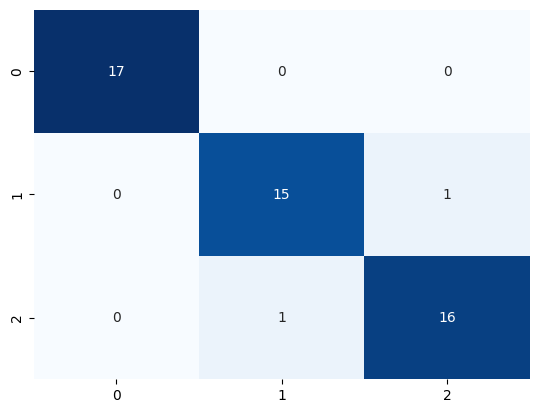

In [ ]:
# Affichage matrice de confusion et rapport de classification
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues', cbar=False, annot=True)